# DATA201  Group  Assignment
University of Canterbury

Group B

# Member: Zhi Gong, Zhuping Yao, Yu Zheng, Jiequan Yu.

In [156]:
library(tidyverse)
library(readxl) #reads excel files
library(magrittr)
library(polite) # polite is the "polite" version of rvest
library(skimr)
library(visdat)
library(ggrepel) #stops overlapping text on ggplot
library(rvest) # rvest makes scraping easier
library(purrr)
library(magick)
library(ggimage)
library(png) #load png
library(grid)
library(wesanderson)

In [157]:
#Read CSV 2015
coun15 <- read_csv(file = "/Users/osx/Desktop/Assignment_201/2015.csv")
coun15 %>%
head(1)

#Read CSV 2016
coun16 <- read_csv(file = "/Users/osx/Desktop/Assignment_201/2016.csv")
coun16 %>%
head(1)

#Read CSV 2017
coun17 <- read_csv(file = "/Users/osx/Desktop/Assignment_201/2017.csv")
coun17 %>%
head(1)

Parsed with column specification:
cols(
  Country = col_character(),
  Region = col_character(),
  `Happiness Rank` = col_integer(),
  `Happiness Score` = col_double(),
  `Standard Error` = col_double(),
  `Economy (GDP per Capita)` = col_double(),
  Family = col_double(),
  `Health (Life Expectancy)` = col_double(),
  Freedom = col_double(),
  `Trust (Government Corruption)` = col_double(),
  Generosity = col_double(),
  `Dystopia Residual` = col_double()
)


Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


Parsed with column specification:
cols(
  Country = col_character(),
  Region = col_character(),
  `Happiness Rank` = col_integer(),
  `Happiness Score` = col_double(),
  `Lower Confidence Interval` = col_double(),
  `Upper Confidence Interval` = col_double(),
  `Economy (GDP per Capita)` = col_double(),
  Family = col_double(),
  `Health (Life Expectancy)` = col_double(),
  Freedom = col_double(),
  `Trust (Government Corruption)` = col_double(),
  Generosity = col_double(),
  `Dystopia Residual` = col_double()
)


Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


Parsed with column specification:
cols(
  Country = col_character(),
  Happiness.Rank = col_integer(),
  Happiness.Score = col_double(),
  Whisker.high = col_double(),
  Whisker.low = col_double(),
  Economy..GDP.per.Capita. = col_double(),
  Family = col_double(),
  Health..Life.Expectancy. = col_double(),
  Freedom = col_double(),
  Generosity = col_double(),
  Trust..Government.Corruption. = col_double(),
  Dystopia.Residual = col_double()
)


Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027


In [158]:
# Reomve unnecessary columns from the dataframe
coun15 = coun15 %>%
        select("Country","Happiness Rank","Happiness Score","Economy (GDP per Capita)","Health (Life Expectancy)","Trust (Government Corruption)")
coun15 %>%
    head(1)

coun16 = coun16 %>%
        select("Country","Happiness Rank","Happiness Score","Economy (GDP per Capita)","Health (Life Expectancy)","Trust (Government Corruption)")
coun16 %>%
    head(1)

Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Trust (Government Corruption)
Switzerland,1,7.587,1.39651,0.94143,0.41978


Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Trust (Government Corruption)
Denmark,1,7.526,1.44178,0.79504,0.44453


In [159]:
# Reomve unnecessary columns from the dataframe
coun17 = coun17 %>%
        select("Country","Happiness.Rank","Happiness.Score","Economy..GDP.per.Capita.","Health..Life.Expectancy.","Trust..Government.Corruption.")
coun17 %>%
head(1)

Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.
Norway,1,7.537,1.616463,0.7966665,0.3159638


In [160]:
# Parmeters: 
#    1. source dataframe
#    2. year of data
#    3. row range
tidy_data = function(dataframe, year, top_150) {
    
    #select the data range form 1 to 150
    dataframe = dataframe[1:top_150,]
    
    #rename all column names
    names(dataframe)[2] = "Happiness_Rank"
    names(dataframe)[3] = "Happiness_Score"
    names(dataframe)[4] = "GDP_per_capita"
    names(dataframe)[5] = "Health"
    names(dataframe)[6] = "Trust_Government_Corruption"
    
    #Add year to each dataframe
    dataframe = dataframe %>% 
        mutate(Year = year)
    
    #Change the data type of year into character
    dataframe$Year = as.character(dataframe$Year)
    
    #Return the whole modified dataframe
    return (dataframe)
    
}

In [161]:
coun15 = tidy_data(coun15,2015,150)
coun16 = tidy_data(coun16,2016,150)
coun17 = tidy_data(coun17,2017,150)

In [162]:
#Check any problems with the dataframe
coun15 %>%
    problems()
coun15 %>%
    problems()
coun15 %>%
    problems()

row,col,expected,actual


row,col,expected,actual


row,col,expected,actual


In [163]:
# combine the 3 dataframes together
coun_bind = rbind(coun15,coun16,coun17)
coun_bind %>%
    head(5)

Country,Happiness_Rank,Happiness_Score,GDP_per_capita,Health,Trust_Government_Corruption,Year
Switzerland,1,7.587,1.39651,0.94143,0.41978,2015
Iceland,2,7.561,1.30232,0.94784,0.14145,2015
Denmark,3,7.527,1.32548,0.87464,0.48357,2015
Norway,4,7.522,1.45900,0.88521,0.36503,2015
Canada,5,7.427,1.32629,0.90563,0.32957,2015


In [164]:
#Check if any problems and missing data after conbined
coun_bind %>%
    problems()
coun_bind %>% skim() %>% kable()

row,col,expected,actual


Skim summary statistics  
 n obs: 450    
 n variables: 7    

Variable type: character

| variable | missing | complete |  n  | min | max | empty | n_unique |
|----------|---------|----------|-----|-----|-----|-------|----------|
| Country  |    0    |   450    | 450 |  4  | 24  |   0   |   163    |
|   Year   |    0    |   450    | 450 |  4  |  4  |   0   |    3     |

Variable type: integer

|    variable    | missing | complete |  n  | mean  |  sd   | p0 | p25 | p50  | p75 | p100 |   hist   |
|----------------|---------|----------|-----|-------|-------|----|-----|------|-----|------|----------|
| Happiness_Rank |    0    |   450    | 450 | 75.49 | 43.35 | 1  | 38  | 75.5 | 113 | 150  | ▇▇▇▇▇▇▇▇ |

Variable type: numeric

|          variable           | missing | complete |  n  | mean |  sd  |  p0  |  p25  |  p50  | p75  | p100 |   hist   |
|-----------------------------|---------|----------|-----|------|------|------|-------|-------|------|------|----------|
|       GDP_per_capita 

In [170]:
head(coun_bind) 

Country,Happiness_Rank,Happiness_Score,GDP_per_capita,Health,Trust_Government_Corruption,Year
Switzerland,1,7.587,1.39651,0.94143,0.41978,2015
Iceland,2,7.561,1.30232,0.94784,0.14145,2015
Denmark,3,7.527,1.32548,0.87464,0.48357,2015
Norway,4,7.522,1.45900,0.88521,0.36503,2015
Canada,5,7.427,1.32629,0.90563,0.32957,2015
Finland,6,7.406,1.29025,0.88911,0.41372,2015


In [177]:
# determine the mean happiness from 2015-2017
year_happiness_mean = coun_bind %>%
    group_by(Year) %>%
    summarise(mean_happiness = mean(Happiness_Score))

year_happiness_mean

Year,mean_happiness
2015,5.486627
2016,5.478400
2017,5.426620


In [178]:
#Read world map(PNG)
world_map <- readPNG("world_map.png")
bg_map <- rasterGrob(world_map, interpolate=TRUE)

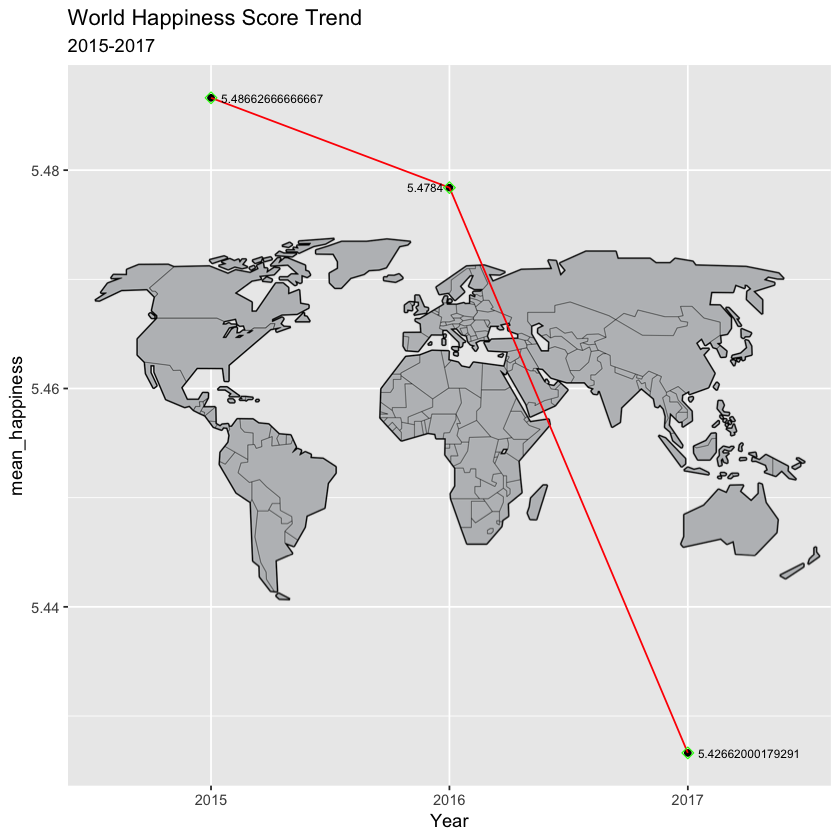

In [179]:
year_happiness_mean %>%
    ggplot(aes(x = Year, y = mean_happiness, group = 1)) + 
    annotation_custom(bg_map, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    geom_point() + geom_line(color = "red") + 
    geom_text_repel(aes(label = mean_happiness),hjust=-0.1, vjust=0.5, size =2.5) +
    labs(x = "Year", y = "mean_happiness",
            title = "World Happiness Score Trend", subtitle = "2015-2017") + 
    geom_point(shape = 5,color = "green",size = 2)

In [14]:
# Mean of happiness of each country
mean_country_happiness = coun_bind %>%
    group_by(Country) %>%
    summarise(mean_happiness = mean(Happiness_Score)) 

# Ranking of the mean of GDP
mean_GDP = coun_bind %>%
    group_by(Country) %>%
    summarise(mean_gdp = mean(GDP_per_capita))

# Meage the two dataframe
gdp_and_happiness = merge(mean_country_happiness, mean_GDP, key = "Country") 
gdp_and_happiness = gdp_and_happiness %>%
    arrange(mean_gdp)

gdp_and_happiness %>%
    head(1)

Country,mean_happiness,mean_gdp
Somalia,5.2955,0.01132159


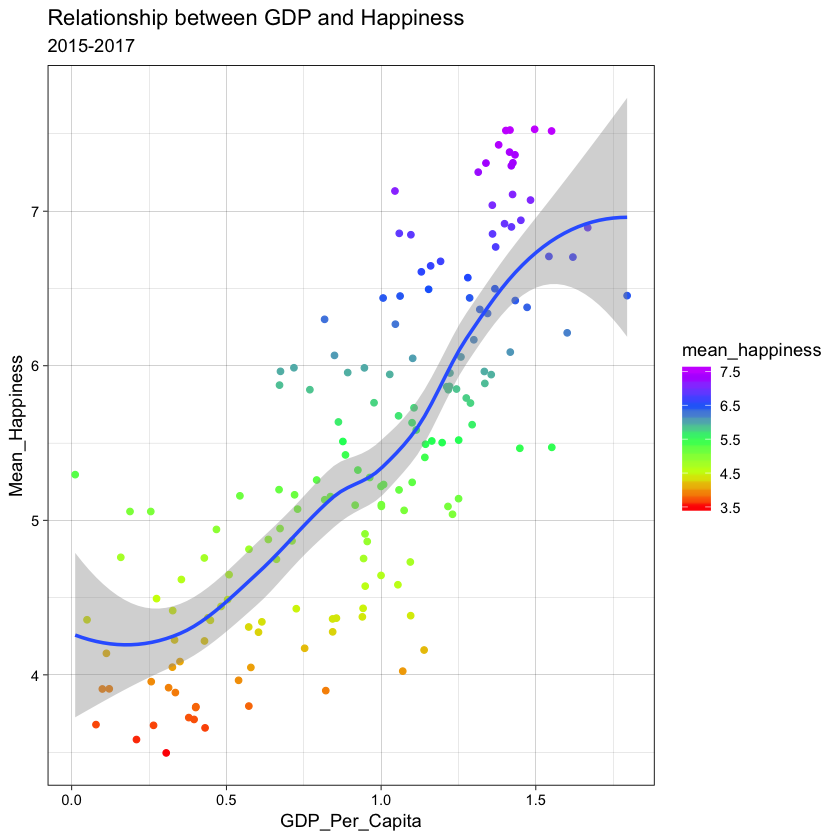

In [94]:
#Draw the plot with relationship between GDP and happiness
gdp_and_happiness %>%
    ggplot(aes(x = mean_gdp, y = mean_happiness, group = 1, color=mean_happiness)) + 
    scale_color_gradientn(colours = rainbow(5)) +
    geom_point() + theme_minimal() + theme_linedraw() + 
    geom_smooth(method ='loess', formula = 'y ~ x') +
    labs(x = "GDP_Per_Capita", y = "Mean_Happiness",
         title = "Relationship between GDP and Happiness", subtitle = "2015-2017")

In [16]:
# Mean of happiness of each country
mean_country_happiness = coun_bind %>%
    group_by(Country) %>%
    summarise(mean_happiness = mean(Happiness_Score)) 
# Ranking of the mean of GDP
mean_country_health = coun_bind %>%
    group_by(Country) %>%
    summarise(mean_health = mean(Health))
# Meage two dataframes
health_and_happiness = merge(mean_country_happiness, mean_country_health, key = "Country") 

health_and_happiness %>%
    head(1)

Country,mean_happiness,mean_health
Afghanistan,3.794,0.1807468


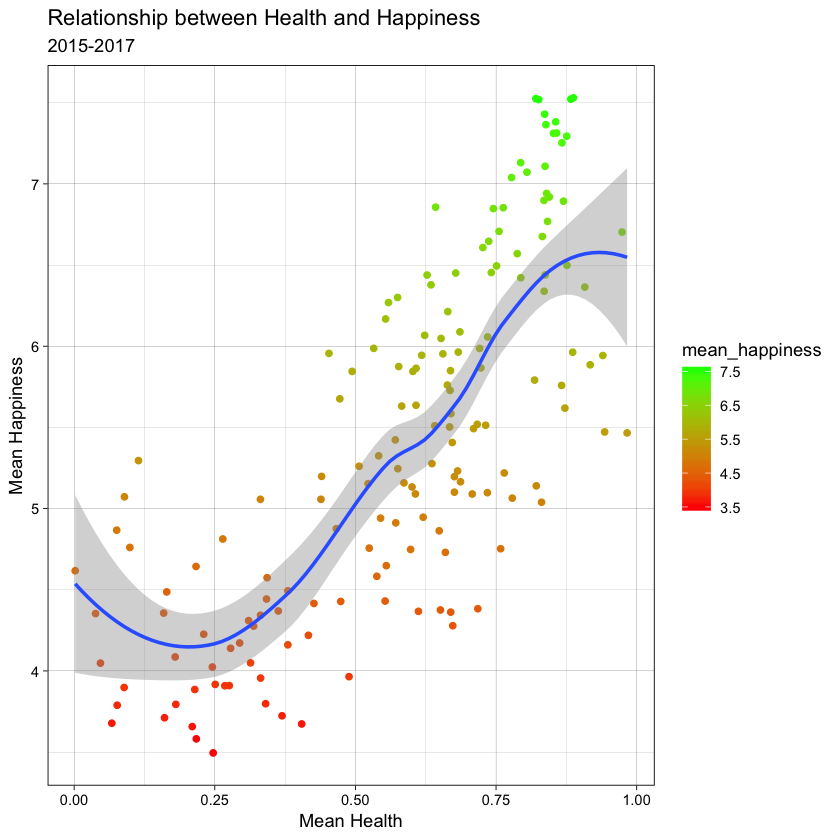

In [89]:
# Draw the plot with relationship between health and happiness
health_and_happiness %>%
    ggplot(aes(x = mean_health, y = mean_happiness, group = 1, color=mean_happiness)) + 
    scale_color_gradient(low="red", high="green") +
    geom_point() + theme_minimal() + theme_linedraw() + 
    geom_smooth(method ='loess', formula = 'y ~ x') +
    labs(x = "Mean Health", y = "Mean Happiness",
         title = "Relationship between Health and Happiness", subtitle = "2015-2017")

In [18]:
# Mean of happiness of each country
mean_country_happiness = coun_bind %>%
    group_by(Country) %>%
    summarise(mean_happiness = mean(Happiness_Score)) 
# Ranking of the mean of GDP
mean_country_trust = coun_bind %>%
    group_by(Country) %>%
    summarise(mean_trust = mean(Trust_Government_Corruption))
#Meage the two dataframe
trust_and_happiness = merge(mean_country_happiness, mean_country_trust, key = "Country") 
trust_and_happiness %>%
    head(1)

Country,mean_happiness,mean_trust
Afghanistan,3.794,0.06115783


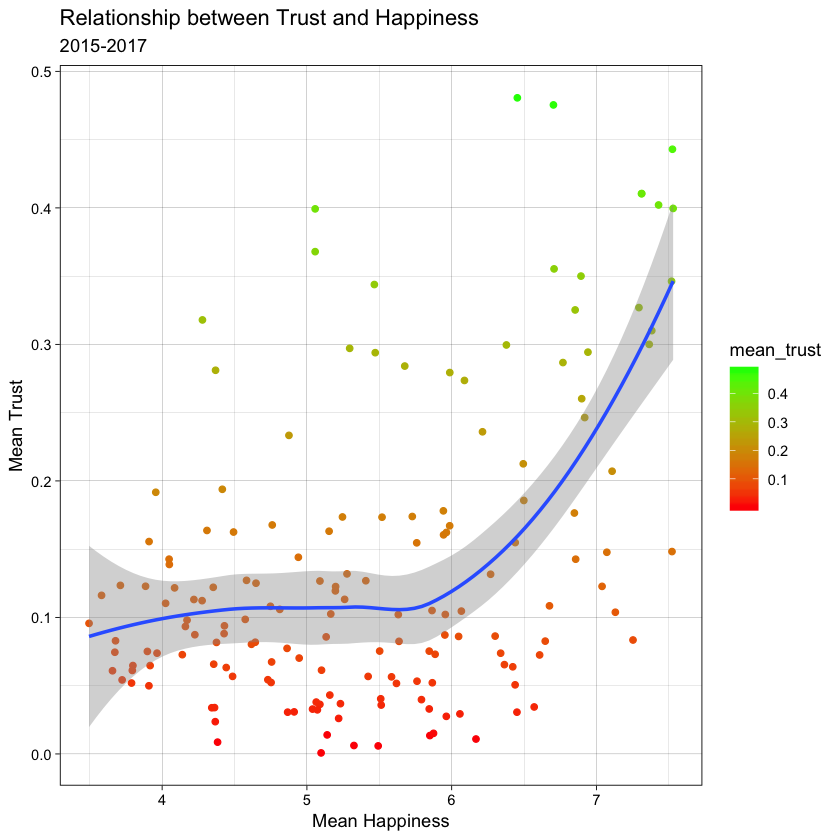

In [101]:
#Draw the plot with relationship between trust of goverment and happiness
trust_and_happiness %>%
    ggplot(aes(x = mean_happiness, y = mean_trust, group = 1, color = mean_trust)) + 
    scale_color_gradient(low="red", high="green") +
    geom_point() + theme_linedraw() + 
    geom_smooth(method ='loess', formula = 'y ~ x') +
    labs(x = "Mean Happiness", y = "Mean Trust",
         title = "Relationship between Trust and Happiness", subtitle = "2015-2017")

In [102]:
# determine the mean of happiness score
mean_country_happiness = coun_bind %>%
    group_by(Country) %>%
    summarise(mean_happiness = mean(Happiness_Score)) 

# Rank the top 30 countries
top_30_countries = mean_country_happiness %>%
    arrange(desc(mean_happiness)) %>%
    top_n(30) %>%
    select(Country)

Selecting by mean_happiness


In [204]:
# Left join two dataframes
joined_top_30 = top_30_countries %>%
    left_join(coun_bind)

# Remove Oman and Puerto Rico, because these two countries only has one year record
top_28 = joined_top_30 %>%
    filter(Country != "Oman") %>%
    filter(Country != "Puerto Rico")

Joining, by = "Country"


In [217]:
# Shows only top 5 contries during 2015-2017
top_5_countries = top_28 %>% head(15)

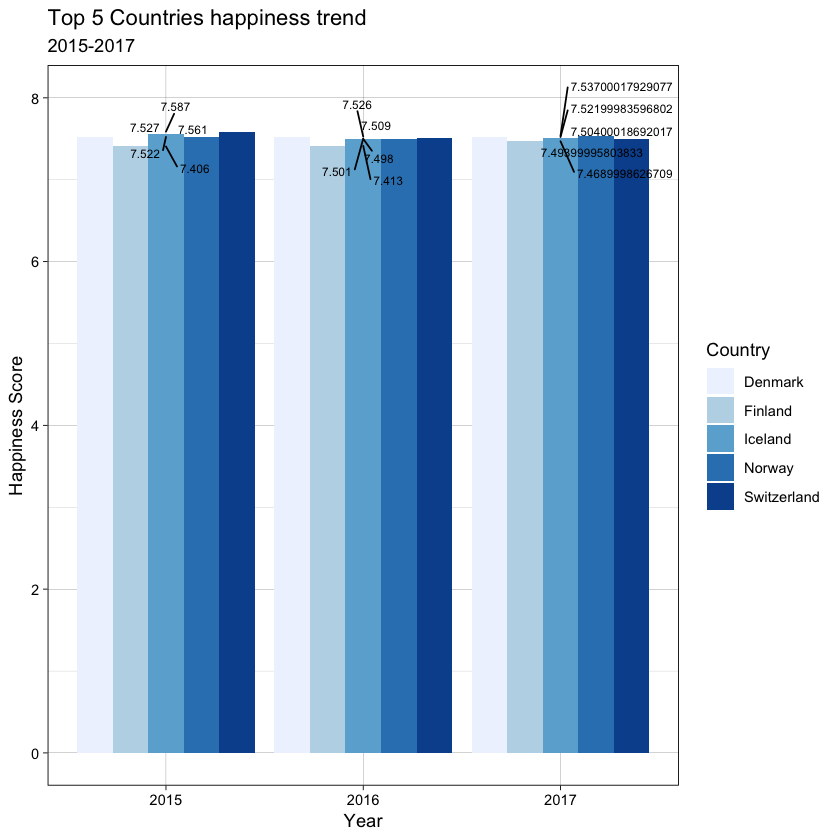

In [223]:
# A bar plot show Top 5 Countries happiness trend
ggplot(data=top_5_countries, aes(x=Year, y=Happiness_Score, fill=Country)) + 
    coord_cartesian(ylim = c(0, 8)) + 
    theme_linedraw() +
    scale_fill_brewer(palette="Blues") +
    geom_bar(stat="identity", position=position_dodge()) +
    labs(x = "Year", y = "Happiness Score",
         title = "Top 5 Countries happiness trend", subtitle = "2015-2017") +
    geom_text_repel(aes(label = Happiness_Score),
         hjust=-0.1, vjust=0.5, size =2.5)